**TASK0**

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('HH Affinity Total & High Level Giving.xlsx')

In [3]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52245 entries, 0 to 52244
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Individual LookupID                        52245 non-null  int64 
 1   UI Giving Range Code                       52245 non-null  int64 
 2   HH Affinity Total (parent, child, spouse)  52245 non-null  int64 
 3   High Level Giving                          52245 non-null  int64 
 4   Age Range Category                         52245 non-null  int64 
 5   Age Range                                  52245 non-null  object
 6   Regional Category Codes                    52245 non-null  int64 
 7   Regional Categories                        52245 non-null  object
dtypes: int64(6), object(2)
memory usage: 3.2+ MB


High Level Giving                              0    1
HH Affinity Total (parent, child, spouse)            
0                                          41407  338
1                                           8813  279
2                                           1183  160
3                                             50   15
Chi-Square Statistic: 1461.22
p-value: 0.0000
Degrees of Freedom: 3
Result: There is a significant relationship between HH Affinity Total and High Level Giving (reject null hypothesis).


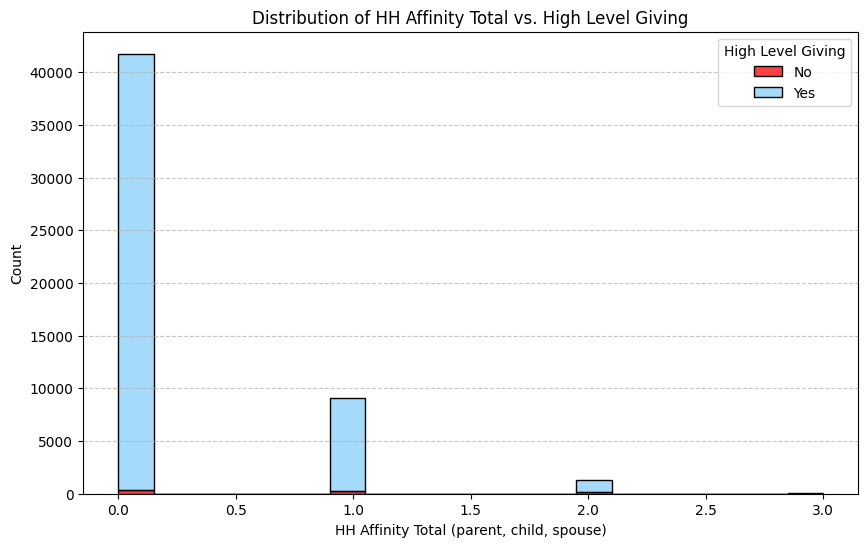

In [4]:
# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['HH Affinity Total (parent, child, spouse)'], df['High Level Giving'])
print(contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print Chi-Square test results
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Interpret the result
if p < 0.05:
    print("Result: There is a significant relationship between HH Affinity Total and High Level Giving (reject null hypothesis).")
else:
    print("Result: No significant relationship between HH Affinity Total and High Level Giving (fail to reject null hypothesis).")

# Define a custom color mapping: No -> Red, Yes -> Light Blue
custom_palette = {1: "red", 0: "lightskyblue"}

# Visualize with custom colors
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="HH Affinity Total (parent, child, spouse)", hue="High Level Giving",
             multiple="stack", bins=20, palette=custom_palette)  # Apply custom colors
plt.xlabel("HH Affinity Total (parent, child, spouse)")
plt.ylabel("Count")
plt.title("Distribution of HH Affinity Total vs. High Level Giving")
plt.legend(title="High Level Giving", labels=["No", "Yes"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


   HH Affinity Total (parent, child, spouse)  total_count  high_giving_count  \
0                                          0        41745                338   
1                                          1         9092                279   
2                                          2         1343                160   
3                                          3           65                 15   

   high_giving_rate  
0          0.809678  
1          3.068632  
2         11.913626  
3         23.076923  


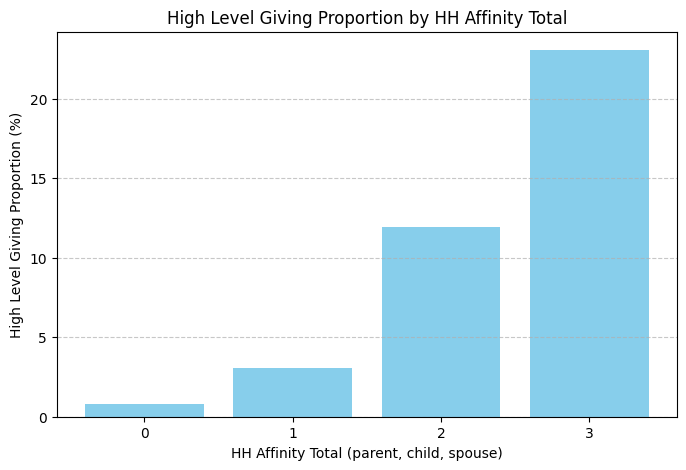

In [5]:
# Group by 'HH Affinity Total (parent, child, spouse)' and calculate the total count and count of High Level Giving (1)
summary_df = df.groupby("HH Affinity Total (parent, child, spouse)")["High Level Giving"].agg(
    total_count="count",  # Total number of entries
    high_giving_count="sum"  # Count of High Level Giving (1)
)

# Calculate the proportion of High Level Giving for each HH Affinity Total
summary_df["high_giving_rate"] = summary_df["high_giving_count"] / summary_df["total_count"] * 100  # Percentage

# Display the summary table
print(summary_df.reset_index())

# Visualize the proportion of High Level Giving for each HH Affinity Total
plt.figure(figsize=(8, 5))
plt.bar(summary_df.index, summary_df["high_giving_rate"], color='skyblue')
plt.xlabel("HH Affinity Total (parent, child, spouse)")  # X-axis label
plt.ylabel("High Level Giving Proportion (%)")  # Y-axis label
plt.title("High Level Giving Proportion by HH Affinity Total")  # Title of the plot
plt.xticks(summary_df.index)  # Set x-ticks for each HH Affinity Total
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

**TASK1**

**For each age group, we perform a chi-square test to determine whether there is a significant relationship between HH Affinity Total and High-Level Giving.**

1. **Chi-Square Value Interpretation**  
   - Higher Chi-Square values indicate a **stronger association** between **HH Affinity Total** and **High-Level Giving** for that age group.
   - Lower values suggest a **weaker or no significant association**.

2. **Observations from the Chart**  
   - **55-64 Age Group** has the highest Chi-Square value (~326), suggesting that for this age group, **HH Affinity Total is highly associated with High-Level Giving**.
   - **65-74 Age Group** also has a high Chi-Square value (~229), indicating a strong association.
   - **45-54 Age Group** (~148) and **75-84 Age Group** (~129) also show significant associations.
   - **35-44 Age Group** has a much lower Chi-Square value (~12), meaning the relationship between **HH Affinity Total and High-Level Giving** is much weaker here.
   - **25-34 Age Group** had **NaN values**, meaning there wasn’t enough data for a valid test.

3. **Key Takeaway**  
   - Middle-aged and older groups (55-64, 65-74) show the strongest relationship between **HH Affinity Total** and **High-Level Giving**.
   - Younger age groups (35-44 and likely 25-34) either have **weak or no significant association**.
   - This suggests that affinity (connections within a household) plays a **bigger role in predicting high-level giving among older individuals** than younger ones.


In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the Excel file
file_path = "/content/HH Affinity Total & High Level Giving.xlsx"
xls = pd.ExcelFile(file_path)

# Load the data from the first sheet
df = pd.read_excel(xls, sheet_name="Sheet1")

# Get unique age groups
age_groups = df["Age Range"].unique()

# Store results
chi_square_results = []

# Perform chi-square test for each age group
for age in age_groups:
    subset = df[df["Age Range"] == age]

    # Create contingency table
    contingency_table = pd.crosstab(
        subset["HH Affinity Total (parent, child, spouse)"],
        subset["High Level Giving"]
    )

    # Perform chi-square test if table is valid
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi_square_results.append([age, chi2, p, dof])
    else:
        chi_square_results.append([age, None, None, None])  # Not enough data

# Convert results to DataFrame
chi_square_df = pd.DataFrame(
    chi_square_results, columns=["Age Range", "Chi-Square", "P-Value", "Degrees of Freedom"]
)

# Display results
print(chi_square_df)



  Age Range  Chi-Square       P-Value  Degrees of Freedom
0     65-74  228.938883  2.345512e-49                 3.0
1     45-54  147.623648  8.577540e-32                 3.0
2     35-44   12.147904  2.302057e-03                 2.0
3     55-64  325.641089  2.802679e-70                 3.0
4     75-84  128.513729  1.130717e-27                 3.0
5     25-34         NaN           NaN                 NaN


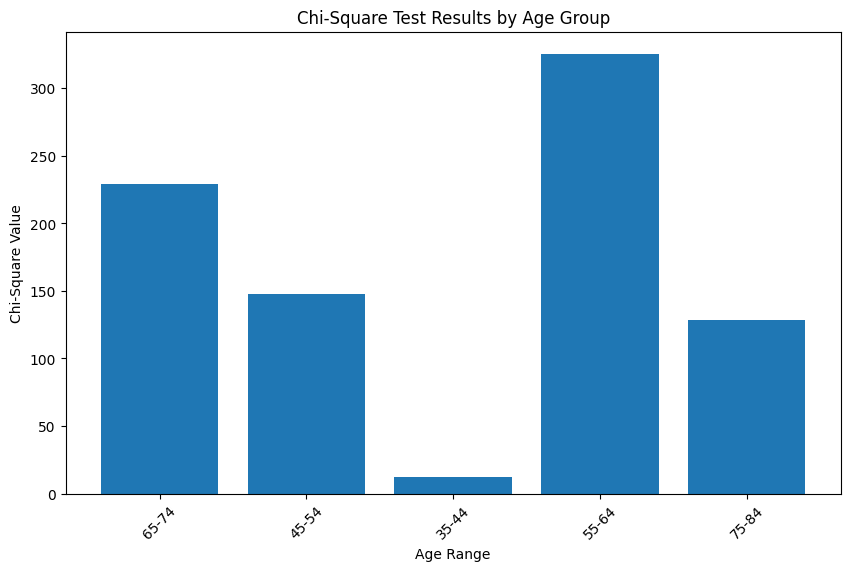

In [14]:
import matplotlib.pyplot as plt

# Remove rows with NaN values for plotting
chi_square_df_clean = chi_square_df.dropna()

# Create a bar plot for Chi-Square values
plt.figure(figsize=(10, 6))
plt.bar(chi_square_df_clean["Age Range"], chi_square_df_clean["Chi-Square"])
plt.xlabel("Age Range")
plt.ylabel("Chi-Square Value")
plt.title("Chi-Square Test Results by Age Group")
plt.xticks(rotation=45)
plt.show()


**TASK 2**

We performed a chi-square for each region to determine whether there is a significant relationship between HH Affinity Total and High-Level Giving across different regional categories.

1. **Chi-Square Value Interpretation**
Higher Chi-Square values indicate a stronger association between HH Affinity Total and High-Level Giving in that region.
Lower values suggest a weaker or no significant association.
2. **Observations from the Chart**
Chicago, IL metro area has the highest Chi-Square value (700), suggesting that in this region, HH Affinity Total is highly associated with High-Level Giving.
Illinois outside Chicago MSA also shows a high Chi-Square value (348), indicating a strong association.
Other United States has a moderate Chi-Square value (275), implying a relatively strong relationship.
Other Midwest (MO, IA, WI, MI, IN, OH, MN) has the lowest Chi-Square value (124), meaning that the relationship between HH Affinity Total and High-Level Giving is much weaker in this region compared to others.
3. **Key Takeaways**
Urban areas, especially the Chicago metropolitan area, exhibit the strongest relationship between HH Affinity Total and High-Level Giving.
Illinois (outside of Chicago MSA) also shows a significant correlation, though slightly lower than in Chicago.
Other U.S. regions maintain moderate association levels, suggesting household affinity plays a role in giving, but not as strongly as in Illinois.
The Midwest region (excluding Illinois) has the weakest association, implying that household affinity might not be a strong predictor of high-level giving in these states.


In [15]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test for each regional category
results = []
for region in df["Regional Categories"].unique():
    subset = df[df["Regional Categories"] == region]
    contingency_table = pd.crosstab(subset["HH Affinity Total (parent, child, spouse)"], subset["High Level Giving"])

    # Ensure table has at least a 2x2 structure before performing the test
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results.append({"Region": region, "Chi-Square": chi2, "p-value": p, "Degrees of Freedom": dof})
    else:
        results.append({"Region": region, "Chi-Square": None, "p-value": None, "Degrees of Freedom": None})

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
display(results_df)

,Region,Chi-Square,p-value,Degrees of Freedom
0,Other United States,274.955781,2.613685e-59,3
1,"Other Midwest (MO, IA, WI, MI, IN, OH, MN)",123.879379,1.126778e-26,3
2,Illinois outside Chicago MSA,348.503086,3.146303e-75,3
3,"Chicago, IL metro area",699.730185,2.401849e-151,3


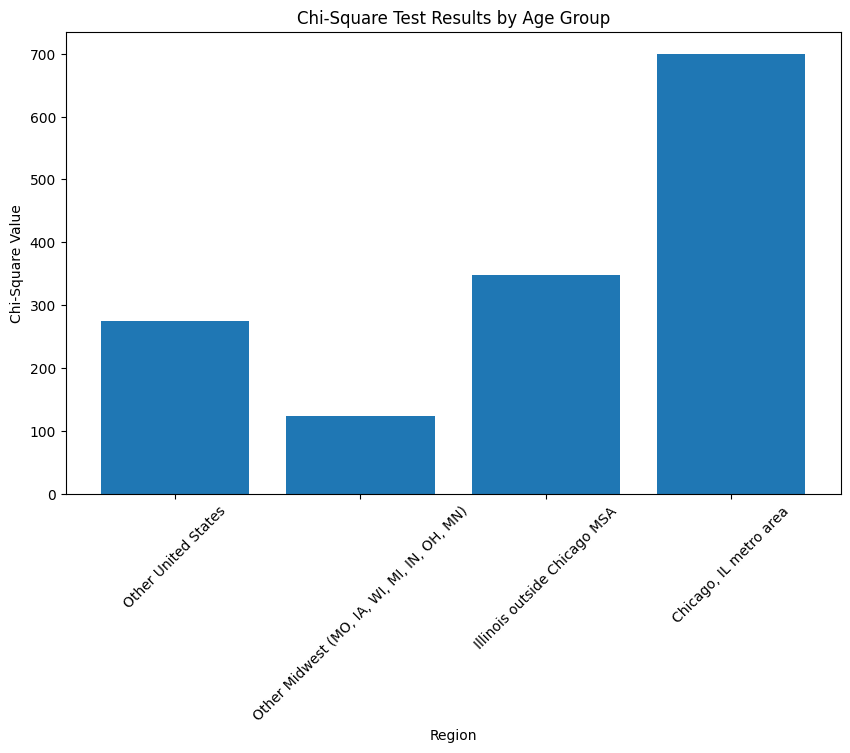

In [16]:
import matplotlib.pyplot as plt

# Remove rows with NaN values for plotting
results_df_clean = results_df.dropna()

# Create a bar plot for Chi-Square values
plt.figure(figsize=(10, 6))
plt.bar(results_df_clean["Region"], results_df_clean["Chi-Square"])
plt.xlabel("Region")
plt.ylabel("Chi-Square Value")
plt.title("Chi-Square Test Results by Age Group")
plt.xticks(rotation=45)
plt.show()
